In [58]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [48]:

# Chargement du dataset
file_path = r"C:\Users\pc\Downloads\BIBDA\S3\Intelligence Artificielle 2\TP 6 - Multilayer perceptron MLP pour prédire prix médian\IRIS_dataset\IRIS_dataset.csv"
data = pd.read_csv(file_path)

# Affichage des premières lignes pour vérifier les données
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          0.0           9.0         10.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [49]:
# Vérification des colonnes du dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [51]:
# Gestion des éventuelles valeurs aberrantes ou incorrectes
data = data[(data['sepal_width'] > 0) & (data['petal_width'] > 0)]  # Exclure les valeurs non valides
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa


In [26]:
# Séparation des variables indépendantes (X) et de la cible (y)
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [27]:

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [28]:
# Standardisation des variables indépendantes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Division des données
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [43]:
# Vérification des tailles des ensembles
print(f"Entraînement : {X_train.shape}, Validation : {X_val.shape}, Test : {X_test.shape}")

Entraînement : (104, 4), Validation : (22, 4), Test : (23, 4)


In [32]:
# Construction du modèle MLP
model = Sequential([
    Input(shape=(4,)),                     # Couche d'entrée avec 4 caractéristiques
    Dense(8, activation='relu'),           # Première couche dense avec 8 neurones
    Dense(6, activation='relu'),           # Deuxième couche dense avec 6 neurones
    Dense(3, activation='softmax')         # Couche de sortie avec 3 neurones pour la classification
])

In [38]:
# Affichage du résumé du modèle
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347 (1.36 KB)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 232 (932.00 B)

In [54]:
# Compilation du modèle
model.compile(optimizer='adam',               # Optimiseur Adam
              loss='sparse_categorical_crossentropy',# Fonction de perte : Erreur quadratique moyenne (Mean Squared Error)
              metrics=['accuracy'])                # Métrique : Erreur absolue moyenne (Mean Absolute Error)

"""
lorsque j'utilise fonction de perte mse et metrics mae, j'obtiens une erreur
mse et mae sont des fonctions adaptées à des problèmes de régression et non à des problèmes de classification.
"""

"\nlorsque j'utilise fonction de perte mse et metrics mae, j'obtiens une erreur\n"

In [53]:
# Entraînement du modèle
history = model.fit(X_train, y_train, 
                    epochs=100,                 # Nombre d'époques
                    batch_size=32,             # Taille des lots
                    validation_data=(X_val, y_val), # Données de validation
                    verbose=1) 

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.8530 - loss: 0.6074 - val_accuracy: 0.8636 - val_loss: 0.7817
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8583 - loss: 0.5622 - val_accuracy: 0.9091 - val_loss: 0.7775
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8374 - loss: 0.6103 - val_accuracy: 0.9091 - val_loss: 0.7736
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8600 - loss: 0.6227 - val_accuracy: 0.9091 - val_loss: 0.7696
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8631 - loss: 0.5687 - val_accuracy: 0.9091 - val_loss: 0.7660
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8392 - loss: 0.6135 - val_accuracy: 0.9091 - val_loss: 0.7625
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8506 - loss: 0.5955 - val_accuracy: 0.9091 - val_loss: 0.7592
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8663 - loss: 0.5619 - val_accuracy: 0.9091 - val_loss

In [55]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Affichage des résultats
print(f"Perte (Loss) sur les données de test : {test_loss}")
print(f"Précision (Accuracy) sur les données de test : {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8261 - loss: 0.5528
Perte (Loss) sur les données de test : 0.5527889728546143
Précision (Accuracy) sur les données de test : 0.8260869383811951


In [56]:
# Prédictions sur l'ensemble de test
y_pred_classes = np.argmax(model.predict(X_test), axis=1)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


In [57]:
# Affichage des résultats
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-score : {f1}")
print("Confusion Matrix :")
print(conf_matrix)

Accuracy : 0.8260869565217391
Precision : 0.8442028985507245
Recall : 0.8260869565217391
F1-score : 0.8272946859903382
Confusion Matrix :
[[6 0 0]
 [0 7 3]
 [0 1 6]]


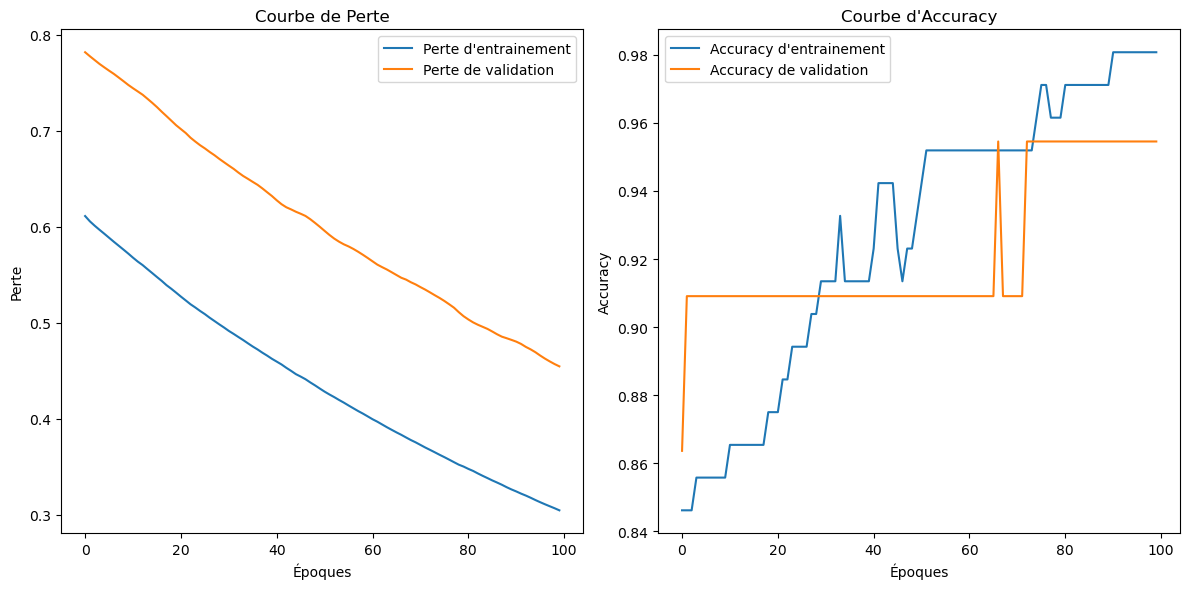

In [59]:
# Visualisation de la courbe d'apprentissage
# Historique de l'entraînement
history_dict = history.history

# Tracer la perte (loss)
plt.figure(figsize=(12, 6))

# Courbe de perte pour l'entraînement et la validation
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Perte d\'entrainement')
plt.plot(history_dict['val_loss'], label='Perte de validation')
plt.title('Courbe de Perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Courbe d'accuracy pour l'entraînement et la validation
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Accuracy d\'entrainement')
plt.plot(history_dict['val_accuracy'], label='Accuracy de validation')
plt.title('Courbe d\'Accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()

# Affichage des courbes
plt.tight_layout()
plt.show()